# Intro to Python 3: Visualization, Lesson II (Gapminder dataset)

Please see the titanic notebook for an introduction to data visualization using **matplotlib** and **seaborn**.

In this lesson, we will apply these two libraries to visualize data from the gapminder dataset.



1. First, we need to import the [**Pandas**, Python's data analysis library](https://pandas.pydata.org/) that allows us to work with dataframes. It is almost universal practice among Python users to import Pandas under the name "pd" to serve as a useful abbreviation we can use when calling Pandas functions. We will also import **pathlib** and **glob** to help us work with file paths.

In [1]:
import pandas as pd
import pathlib, glob
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data, Statistics... and Optimism?</h2>
<img src="https://m.media-amazon.com/images/I/81KGpG+9mNL._RI_.jpg" style="width:60%;">


2. Watch the famous video of Hans Rosling's Presentation with the Gapminder dataset: ["200 Countries, 200 Years, 4 Minutes"](https://www.youtube.com/watch?v=jbkSRLYSojo).

3. Now let's import this dataset:



In [2]:
gapminder_path = Path("~/shared/RR-workshop-data/gapminder").expanduser() 
gapminder_csvpath = Path(gapminder_path, "gapminder_all.csv")
gapminder_df = pd.read_csv(gapminder_csvpath)

<div class="alert alert-success" role="alert"><p style="color:green">4. Now, use the .head(), .describe(), .columns and other methods you learned in the previous lesson to review summary information about this dataset.</p></div>

<div class="alert alert-success" role="alert"><p style="color:green">5. How would you go about recreating Hans Rosling's visualization for one year, 1952? What seaborn plot type would you use?

<p style = "color:green">What data would you place on your x and y axes? Create a plot with just this x and y info included.</p></div>

<div class="alert alert-success" role="alert"><p style="color:green">5b. Now re-create the same graph, but this time with data for 1957.</p></div>

6. Notice the strange outlier on the far right of the plots above? We can subset or filter our dataset to identify it in several ways:

In [3]:
gapminder_df[gapminder_df['gdpPercap_1957'] > 100000]

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
92,Asia,Kuwait,108382.3529,113523.1329,95458.11176,80894.88326,109347.867,59265.47714,31354.03573,28118.42998,...,358266.0,575003.0,841934.0,1140357.0,1497494.0,1891487.0,1418095.0,1765345.0,2111561,2505559


7. We can also identify outliers by adding labels. This code gets slightly more complicated, but notice it is the **plt.annotate** command that adds the label of each country within a **for loop** that iterates through a list of countries in the dataset.

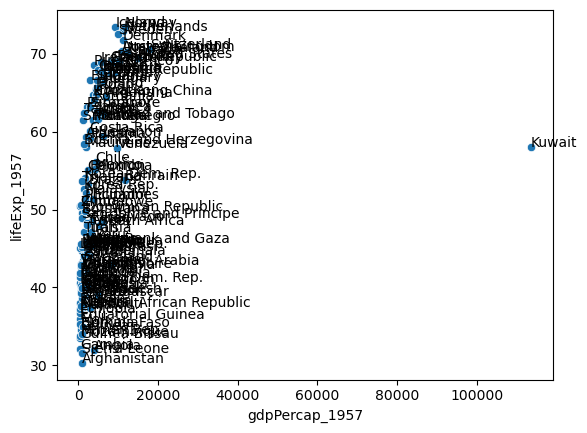

In [4]:
sns.scatterplot(data = gapminder_df, x = "gdpPercap_1957", y = "lifeExp_1957")
#for i, row in enumerate(rows):
countries = list(gapminder_df['country'])
for i, country in enumerate(countries):
    plt.annotate(country, (gapminder_df.loc[i, 'gdpPercap_1957'], gapminder_df.loc[i, 'lifeExp_1957']))

7b. We can also annotate a single country with the following:

*Note: there may be an easier way of doing this....*

Text(113523.1329, 58.033, 'Kuwait')

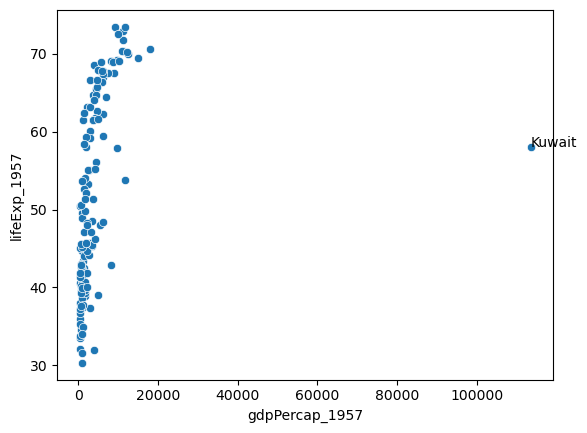

In [5]:
sns.scatterplot(data = gapminder_df, x = "gdpPercap_1957", y = "lifeExp_1957")
plt.annotate("Kuwait", (gapminder_df.loc[92,"gdpPercap_1957"], gapminder_df.loc[92,"lifeExp_1957"]))

8. We can then remove this outlier from our dataset.

9. Now, let's plot a series of years from our dataset. We can more easily plot different years using a formatted string. A formatted string allows us to insert variables into a string, from which Python will read the variables' values.

Formatted strings are indicated by the "f" that precedes the opening quotation mark and variable names are indicated by the quotation marks surrounding them:

```
f"This is a sentence with a {variable}."
```

For example, we could use formatted strings to update today's date by writing:



In [6]:
mon = "April"
date = 25
year = 2023
f"Hello, today's date is {mon} {date}, {year}." 

"Hello, today's date is April 25, 2023."

Try updated the date above and see how the output changes.

10. Now, let's use formatted strings to quickly change the year of our plot.

<AxesSubplot:xlabel='gdpPercap_1997', ylabel='lifeExp_1997'>

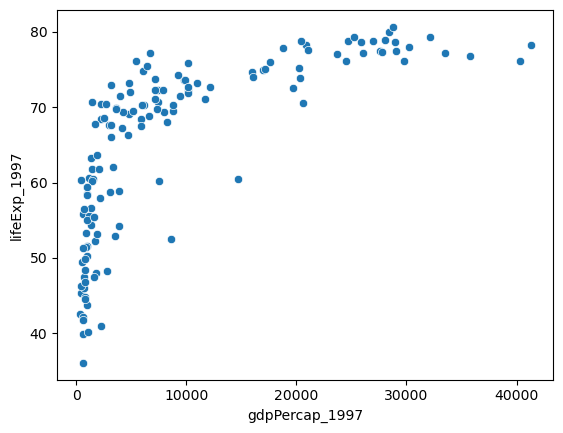

In [7]:
yr = 1997
sns.scatterplot(data = gapminder_df, x = f"gdpPercap_{yr}", y = f"lifeExp_{yr}")

<div class="alert alert-success" role="alert"><p style="color:green">11. Do you notice the nonlinear pattern in this data, which did not appear in Hans Rosling's animated visualization. That is because he used the logarithmic values of GDP per capita. Copy and paste the above code below, but this time adding the following line after it:</p></div>

```
plt.xscale('log')
```

<div class="alert alert-success" role="alert"><p style="color:green"><b>Experiment with the code below by changing the year value.</b></p></div>

<div class="alert alert-success" role="alert"><p style="color:green">12. We can then differentiate countries by their continent. To color each observation by the "continent" column add the following to the code above (you can paste it below).</p></div>

```
..., hue = "continent"...)
```

<div class="alert alert-success" role="alert"><p style="color:green">13. We can also resize each point to represent the population of each country. Copy and paste the above code below and then set a <b>size</b> argument to the appropriate population column.</p></div>

<div class="alert alert-success" role="alert"><p style="color:green">14. To greater differentiate between small and large countries, add a range of sizes like so:</p></div>

```
, sizes = (20, 600)

```

<div class="alert alert-success" role="alert"><p style="color:green"><i>If you were preparing this graph for publication, you would want to think carefully about how you want to proportionally size each circle. The general recommendation is that a value that is twice the size of another should be represented by a circle with twice the **area** not twice the **diameter** of the other. But, for this example, we are just concerned with placing countries of different population size on an observable spectrum.</i></p></div>

<div class="alert alert-success" role="alert"><p style="color:green">14. We can adjust the transparency of the circles to make overlapping circles more visible. We can do that using the **alpha** argument or paremeter. Add:</p></div>

```
alpha = 0.5,
```

<div class="alert alert-success" role="alert"><p style="color:green">Then feel free to adjust that value to see what looks the best (between 0.0 [invisible] and 1.0 [completely solid]).</p></div>

## II. Adding a fourth dimension

15. So far we have graphed the following variables
+ country (circles)
+ continent (color of circles)
+ gdp per capita for each country (x)
+ life expectancy for each country (y)

However, we have done so only one year at a time. How can we graph changes in these data over time?

There are two principal ways to do this:
1. create small multiple plots, one for each year (good for print)
2. create an animated graph (great for the web)

Before, we do that, however, we need to transform our dataset from a "wide" dataframe to a "long" dataframe to allow us to visualize all years at once (rather than one year at a time).

Our wide dataframe looks like this:

In [8]:
gapminder_df.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


16. We need to convert this wide dataframe into a long dataframe that looks something like this:

| continent | country | year | gdp_pc | life_exp | pop |
| :- | :- | :- | :- | :- | :- |
| Africa | Algeria | 1952 | 2449.0 | xx | xx |
| Africa | Algeria | 1957 | 3014.0 | xx | xx |
| Africa | Algeria | 1962 | 2550.8 | xx | xx |

Thus, in the wide dataframe we had one row per country with multiple gdp columns (one for each year).

In contrast, in the long dataframe we want one row per country + year (and thus, only one gdp, life expectancy, and population column for each year).

<div class="alert alert-success" role="alert"><p style="color:green">17. Let's take a look at the column names for our dataframe. Do you remember how to do that? If so, enter the code below.</p></div>

18. If we count the columns, we notice that the gdp columns are column numbers 2 - 13, life expectancy data is stored in columns 14 - 25, and population data in columns 26 - 37. To convert the dataframe from wide to long we will use **Panda**'s **melt** function in the following manner:

```
gdp_cols = [list of names of gdp columns to keep]
call pd.melt() function, passing in the "country" and "continent" columns as the identifying columns 
and our gdp_cols list as the columns to rotate from wide to long
Then we rename the new "value" column to "gdp"
```

Try the following:

In [9]:
gdp_cols = gapminder_df.columns.tolist()[2:14] #https://stackoverflow.com/questions/54465230/python-dataframe-melt-how-to-select-a-range-of-columns-as-the-identifier-vari
gm_gdp_long = pd.melt(gapminder_df, id_vars=['country', 'continent'], value_vars=gdp_cols)
gm_gdp_long = gm_gdp_long.rename(columns = {"value": "gdp_pc"})
gm_gdp_long

,country,continent,variable,gdp_pc
0,Algeria,Africa,gdpPercap_1952,2449.008185
1,Angola,Africa,gdpPercap_1952,3520.610273
2,Benin,Africa,gdpPercap_1952,1062.752200
3,Botswana,Africa,gdpPercap_1952,851.241141
4,Burkina Faso,Africa,gdpPercap_1952,543.255241
...,...,...,...,...
1699,Switzerland,Europe,gdpPercap_2007,37506.419070
1700,Turkey,Europe,gdpPercap_2007,8458.276384
1701,United Kingdom,Europe,gdpPercap_2007,33203.261280
1702,Australia,Oceania,gdpPercap_2007,34435.367440


19. Next, we need to create a new column identifying the year for each row. Fortunately that information is already provided in the "variable" column. Can you guess what the following does before running it?

In [10]:
gm_gdp_long['year'] = gm_gdp_long['variable'].str.slice(-4,).astype(int)


<div class="alert alert-success" role="alert"><p style="color:green">20. Let's take a closer look at the results using the <b>.head()</b> and <b>.tail()</b> methods.</p></div>

21. This has succesfully rotated our wide dataframe into a long dataframe for our gdp data. We now want to do the same for the life expectancy and population columns. Run the following:

In [11]:
le_cols = gapminder_df.columns.tolist()[14:26] #https://stackoverflow.com/questions/54465230/python-dataframe-melt-how-to-select-a-range-of-columns-as-the-identifier-vari
gm_le_long = pd.melt(gapminder_df, id_vars=['country', 'continent'], value_vars=le_cols)
gm_le_long = gm_le_long.rename(columns = {"value": "life_exp"})
gm_le_long

,country,continent,variable,life_exp
0,Algeria,Africa,lifeExp_1952,43.077
1,Angola,Africa,lifeExp_1952,30.015
2,Benin,Africa,lifeExp_1952,38.223
3,Botswana,Africa,lifeExp_1952,47.622
4,Burkina Faso,Africa,lifeExp_1952,31.975
...,...,...,...,...
1699,Switzerland,Europe,lifeExp_2007,81.701
1700,Turkey,Europe,lifeExp_2007,71.777
1701,United Kingdom,Europe,lifeExp_2007,79.425
1702,Australia,Oceania,lifeExp_2007,81.235


In [12]:
gm_le_long['year'] = gm_le_long['variable'].str.slice(-4,).astype(int)
gm_le_long.tail()

,country,continent,variable,life_exp,year
1699,Switzerland,Europe,lifeExp_2007,81.701,2007
1700,Turkey,Europe,lifeExp_2007,71.777,2007
1701,United Kingdom,Europe,lifeExp_2007,79.425,2007
1702,Australia,Oceania,lifeExp_2007,81.235,2007
1703,New Zealand,Oceania,lifeExp_2007,80.204,2007


In [13]:
pop_cols = gapminder_df.columns.tolist()[26:38] #https://stackoverflow.com/questions/54465230/python-dataframe-melt-how-to-select-a-range-of-columns-as-the-identifier-vari
gm_pop_long = pd.melt(gapminder_df, id_vars=['country', 'continent'], value_vars=pop_cols)
gm_pop_long = gm_pop_long.rename(columns = {"value": "pop"})
gm_pop_long['year'] = gm_pop_long['variable'].str.slice(-4,).astype(int)
gm_pop_long.tail()

,country,continent,variable,pop,year
1699,Switzerland,Europe,pop_2007,7554661.0,2007
1700,Turkey,Europe,pop_2007,71158647.0,2007
1701,United Kingdom,Europe,pop_2007,60776238.0,2007
1702,Australia,Oceania,pop_2007,20434176.0,2007
1703,New Zealand,Oceania,pop_2007,4115771.0,2007


22. We now have created three separate "long" or "tall" dataframes from our original "wide" dataframe:
+ gm_gdp_long
+ gm_le_long
+ gm_pop_long

Next, we need to combine these dataframes together. We will do so by:
+ examining the column names and the **shape** of each long dataframe
+ dropping columns that are unnecessary or will be repeated after merging these datasets
+ merging the 3 dataframes together using **Panda**'s merge (**pd.merge()**) function.

In [14]:
print(gm_gdp_long.columns)
print(gm_gdp_long.shape)
print(gm_le_long.columns)
print(gm_le_long.shape)
print(gm_pop_long.columns)
print(gm_pop_long.shape)

Index(['country', 'continent', 'variable', 'gdp_pc', 'year'], dtype='object')
(1704, 5)
Index(['country', 'continent', 'variable', 'life_exp', 'year'], dtype='object')
(1704, 5)
Index(['country', 'continent', 'variable', 'pop', 'year'], dtype='object')
(1704, 5)


In [15]:
# The "errors = 'ignore'" parameter here tells Python to drop the columns if they exist, but if not
## to ignore this drop command.
gm_gdp_long = gm_gdp_long.drop(columns = ["variable"], errors='ignore')
gm_le_long = gm_le_long.drop(columns = ['continent', 'variable'], errors='ignore')
gm_pop_long = gm_pop_long.drop(columns = ['continent', 'variable'], errors='ignore')

In [16]:
print(gm_gdp_long.columns)
print(gm_gdp_long.shape)
print(gm_le_long.columns)
print(gm_le_long.shape)
print(gm_pop_long.columns)
print(gm_pop_long.shape)

Index(['country', 'continent', 'gdp_pc', 'year'], dtype='object')
(1704, 4)
Index(['country', 'life_exp', 'year'], dtype='object')
(1704, 3)
Index(['country', 'pop', 'year'], dtype='object')
(1704, 3)


In [17]:
gm_gdp_le = pd.merge(left = gm_gdp_long, right = gm_le_long, on = ["country", "year"])
gm_long = pd.merge(left = gm_gdp_le, right = gm_pop_long, on = ['country', 'year'])
gm_long

,country,continent,gdp_pc,year,life_exp,pop
0,Algeria,Africa,2449.008185,1952,43.077,9279525.0
1,Angola,Africa,3520.610273,1952,30.015,4232095.0
2,Benin,Africa,1062.752200,1952,38.223,1738315.0
3,Botswana,Africa,851.241141,1952,47.622,442308.0
4,Burkina Faso,Africa,543.255241,1952,31.975,4469979.0
...,...,...,...,...,...,...
1699,Switzerland,Europe,37506.419070,2007,81.701,7554661.0
1700,Turkey,Europe,8458.276384,2007,71.777,71158647.0
1701,United Kingdom,Europe,33203.261280,2007,79.425,60776238.0
1702,Australia,Oceania,34435.367440,2007,81.235,20434176.0


### IIb. Creating small multiples

23. Most data visualization packages allow you to create multiple small version of a graph, each one representing a different subset of the data, using what are often called **facets**. We can use Seaborn [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) or [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) to accomplish this.

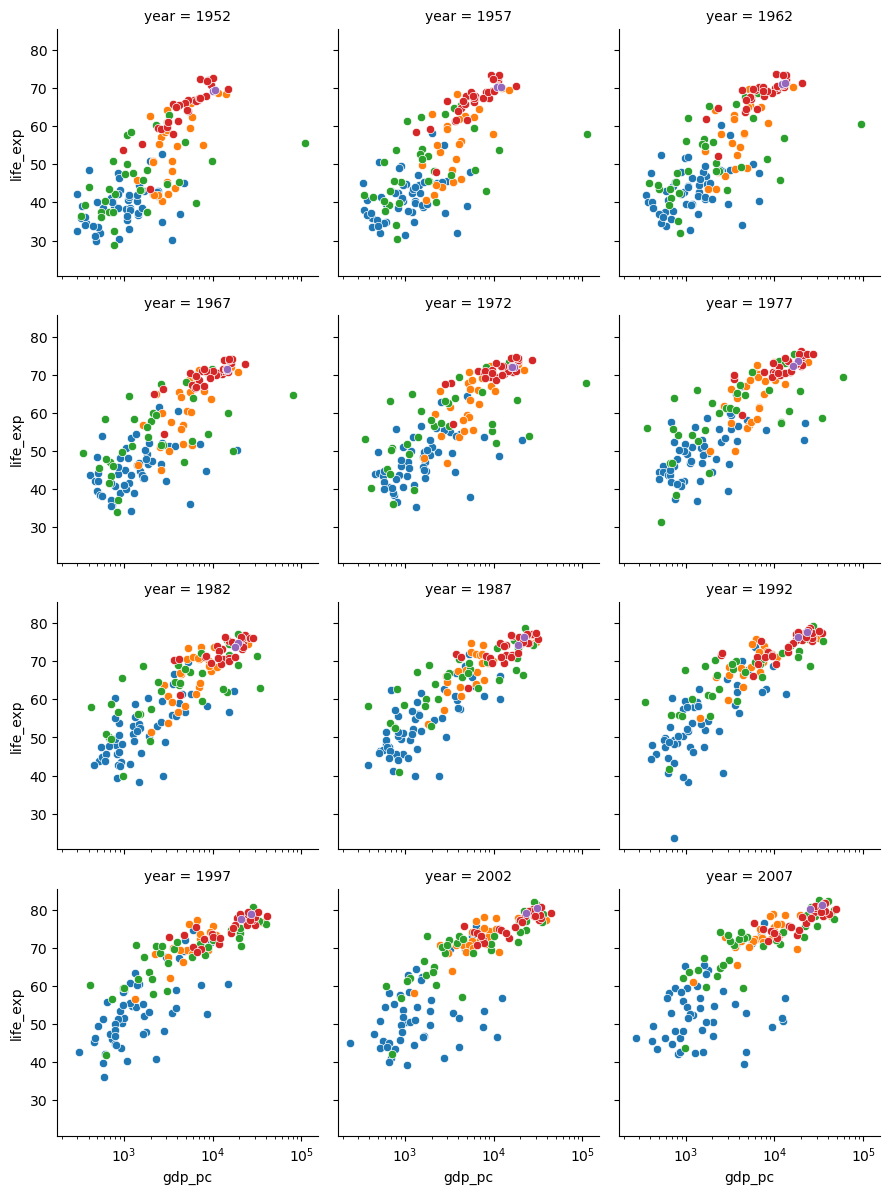

In [18]:
g = sns.FacetGrid(data = gm_long, col="year", col_wrap = 3, hue = "continent")
g.map(sns.scatterplot, "gdp_pc", "life_exp")
plt.xscale('log')

24. Here is the same thing, but using **relplot** with some additional parameters (setting the transparency with "alpha" and the size of each marker).

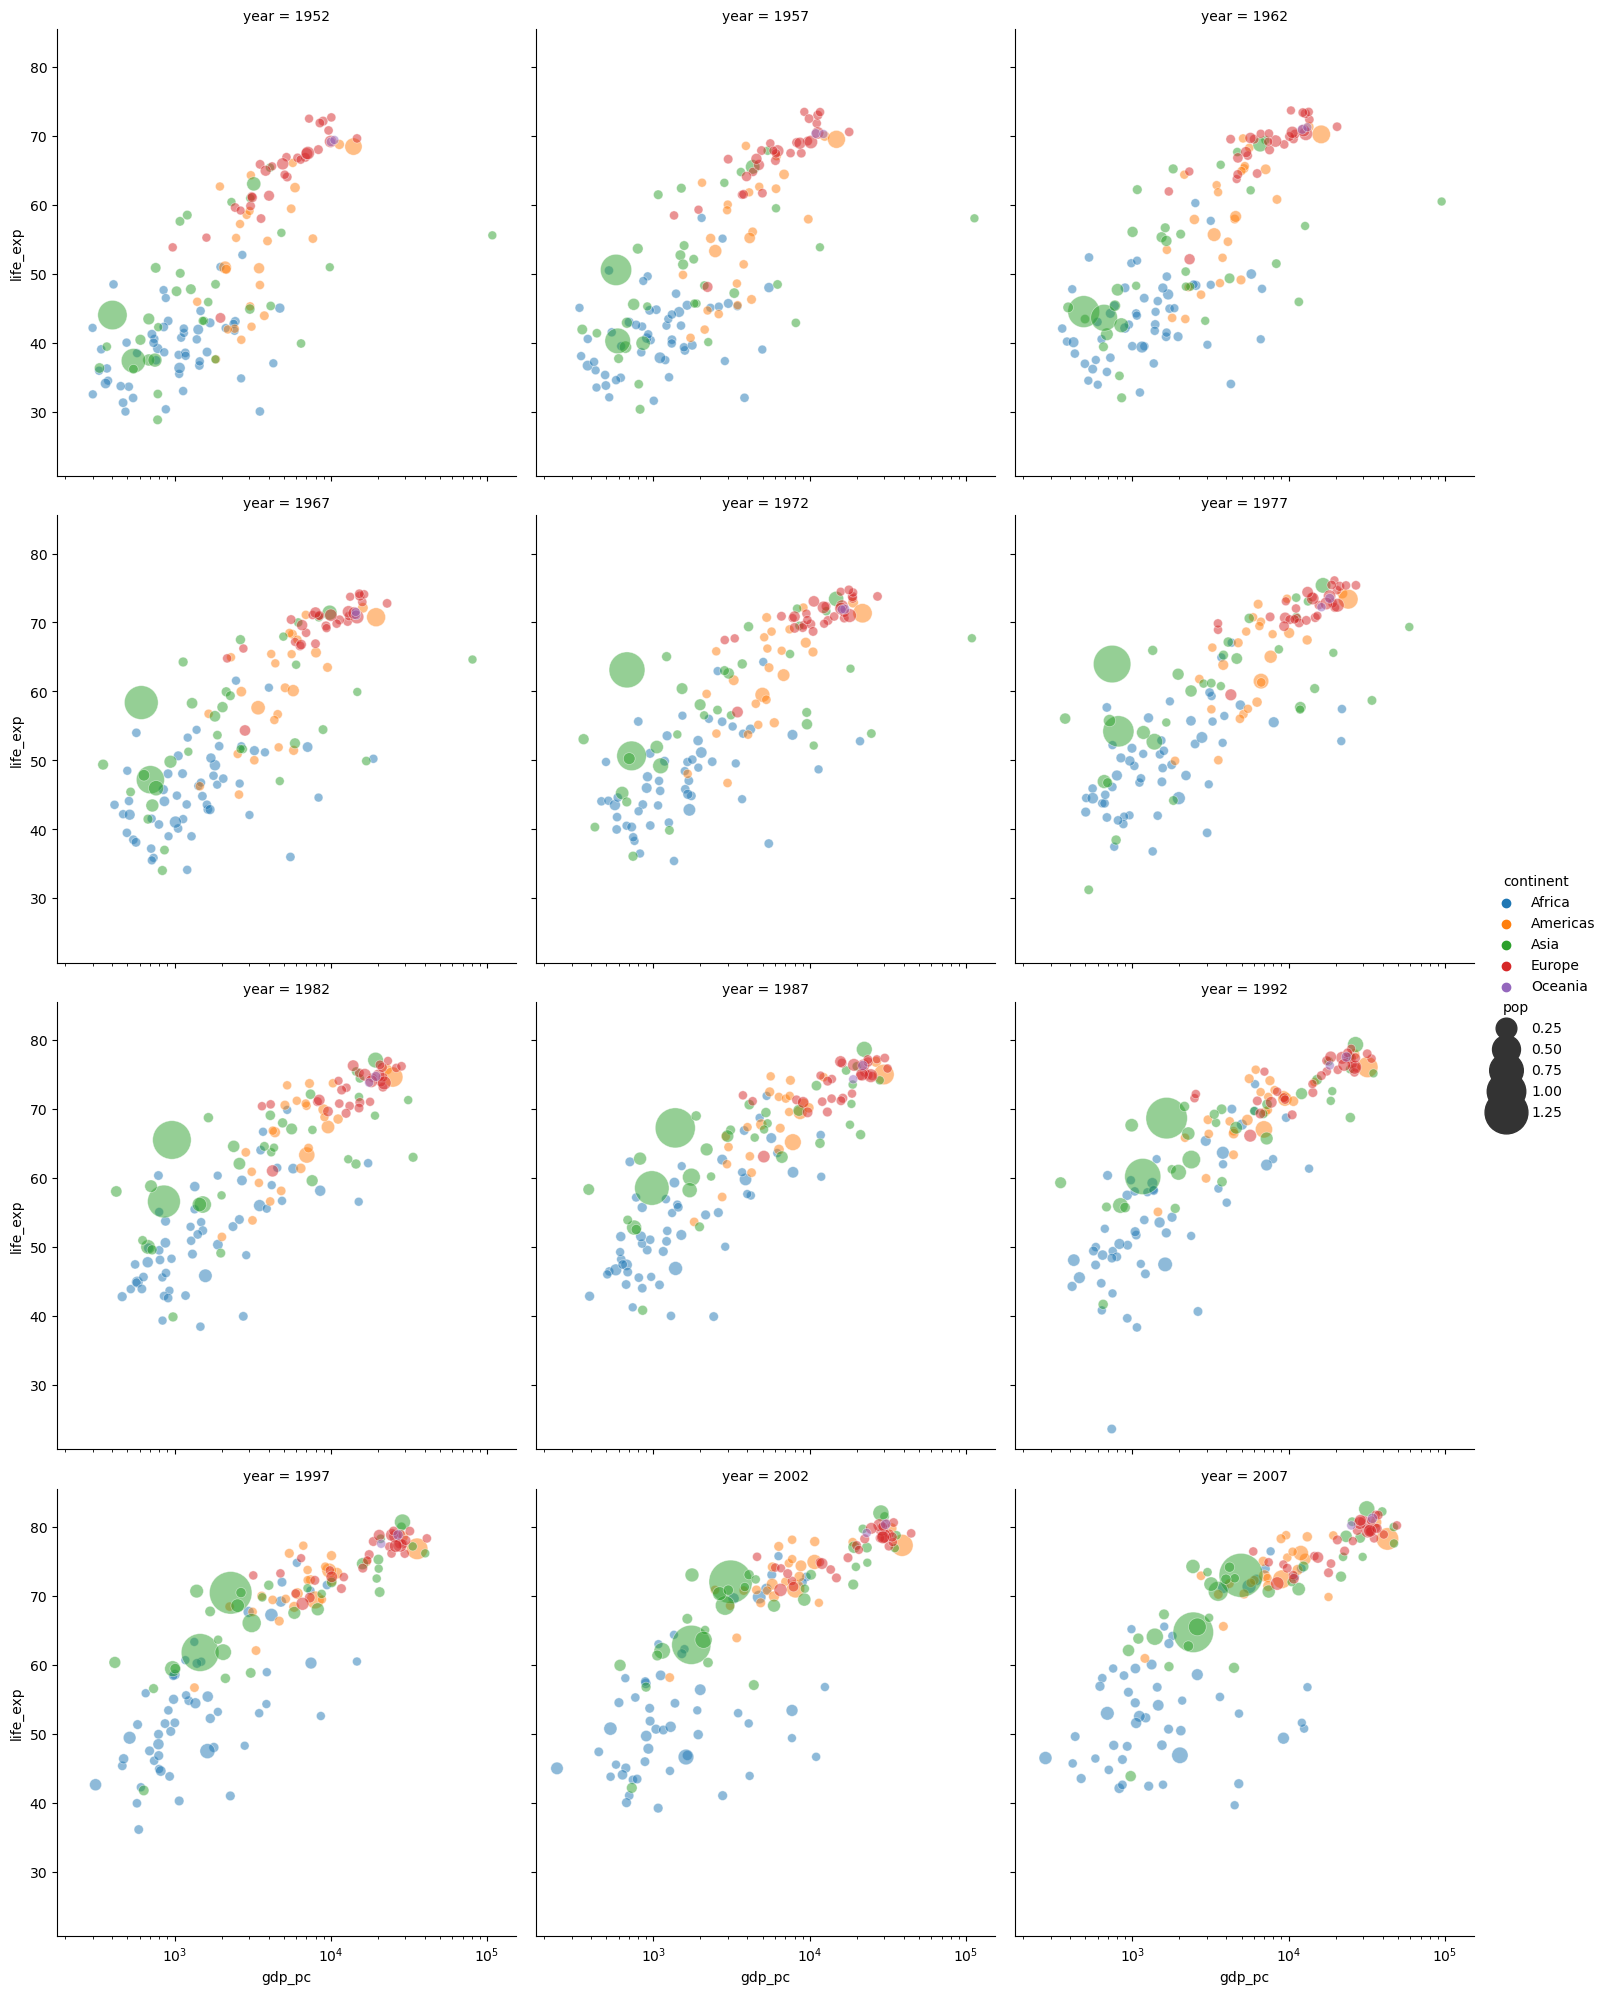

In [19]:
sns.relplot(data = gm_long, x = "gdp_pc", y = "life_exp", size = "pop", hue = "continent",\
            col = "year", col_wrap = 3, \
                sizes = (40, 1000), alpha = 0.5)
plt.xscale('log')

### IIc. Creating Animated Graphs with Plotly

25. An even better way to add time as a fourth dimension is by creating an animated graphic. We can do that using the [Plotly library](https://plotly.com/python/). Below, however, we will use [Plotly Express](https://plotly.com/python/plotly-express/), which is a simplified, easier-to-use version of Plotly.

https://towardsdatascience.com/recreating-gapminder-animation-in-2-lines-of-python-with-plotly-express-2060c73bedec

In [20]:
import plotly_express as px

26. Interestingly, the gapminder dataset is included among Plotly Express's preloaded datasets.

In [21]:
gap2 = px.data.gapminder()
gap2


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


27. Plotly Express's **scatter** function is similar to Seaborn's **scatterplot**. Important new parameters include **animation_frame**, **animation_group**, and **hover_name**.

In [22]:
px.scatter(gap2, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", 
           log_x = True, 
           size_max=45, range_x=[100,100000], range_y=[25,90])

## Appendix: Other Visualizations of the Gapminder Dataset

We can also create simple plots, with far less data, through aggregation. For example, we can create a line plot after aggregating per capita GDP by continent.

<AxesSubplot:xlabel='year', ylabel='gdp_pc'>

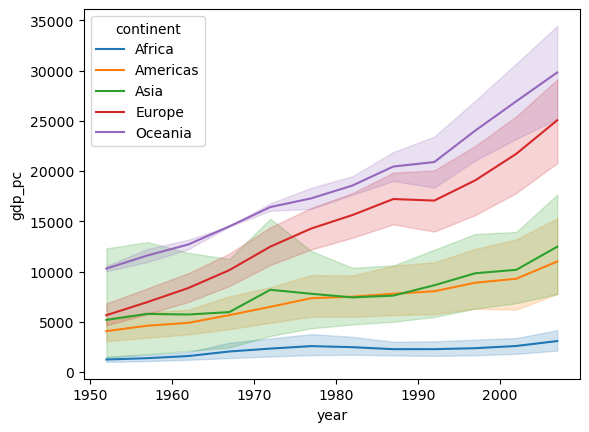

In [23]:
sns.lineplot(data = gm_gdp_long, x = 'year', y = 'gdp_pc', hue = 'continent')

In [24]:
gm_gdp_usa = gm_gdp_long.loc[(gm_gdp_long['country'] == "United States")] #& (gm_long['variable'].str.slice(0,3) == "gdp")]
gm_gdp_usa

,country,continent,gdp_pc,year
74,United States,Americas,13990.48208,1952
216,United States,Americas,14847.12712,1957
358,United States,Americas,16173.14586,1962
500,United States,Americas,19530.36557,1967
642,United States,Americas,21806.03594,1972
784,United States,Americas,24072.63213,1977
926,United States,Americas,25009.55914,1982
1068,United States,Americas,29884.35041,1987
1210,United States,Americas,32003.93224,1992
1352,United States,Americas,35767.43303,1997


<AxesSubplot:xlabel='year', ylabel='gdp_pc'>

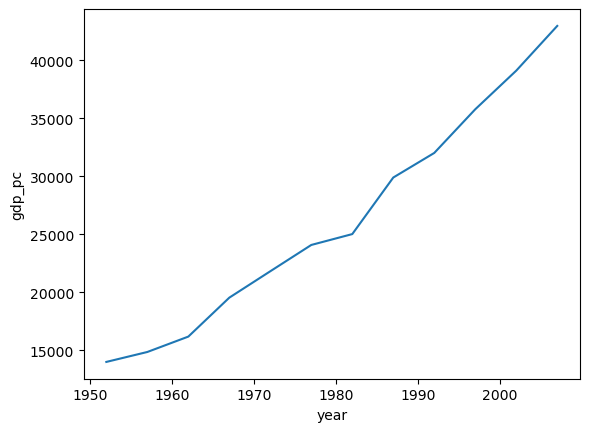

In [25]:
sns.lineplot(data = gm_gdp_usa, x = 'year', y = 'gdp_pc')

In [26]:
#gm_gdp_all = gm_long.loc[(gm_long['variable'].str.slice(0,3) == "gdp")]
#gm_gdp_all

We can also separate each line into facets:

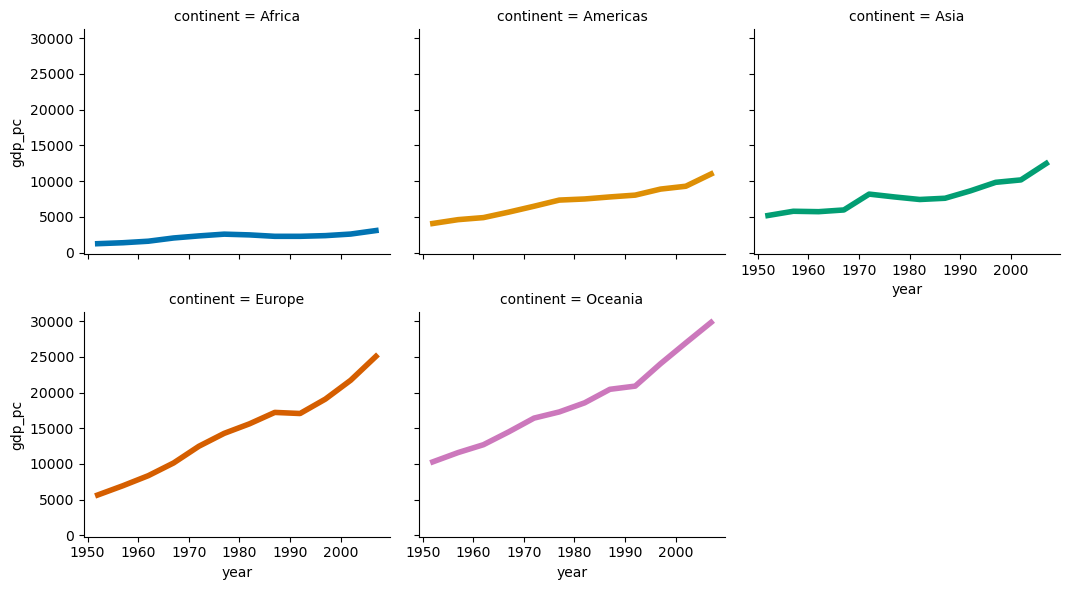

In [27]:
sns.relplot(data = gm_gdp_long, x="year", y="gdp_pc", kind = "line", linewidth = 4, \
            hue = "continent", \
                col = "continent",\
                    ci = None, \
                    col_wrap = 3, height = 3, aspect = 1.2, legend = False,\
                    palette = "colorblind"   #https://seaborn.pydata.org/tutorial/color_palettes.html
                        )